# Gabor Filter

### A general type of Gabor filter[1] can be defined:
            g(x,y,λ,θ,σ,γ)=exp(− (X^2 + γ^2 * Y^2)/ 2σ^2 ).cos(2π/λ*X),
            X = x cos(θ) + y sin(θ), Y= − x sin(θ) + y cos(θ),
            
where λ = wavelength, θ = orientation, σ = standard deviation, and γ = aspect ratio.            

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d

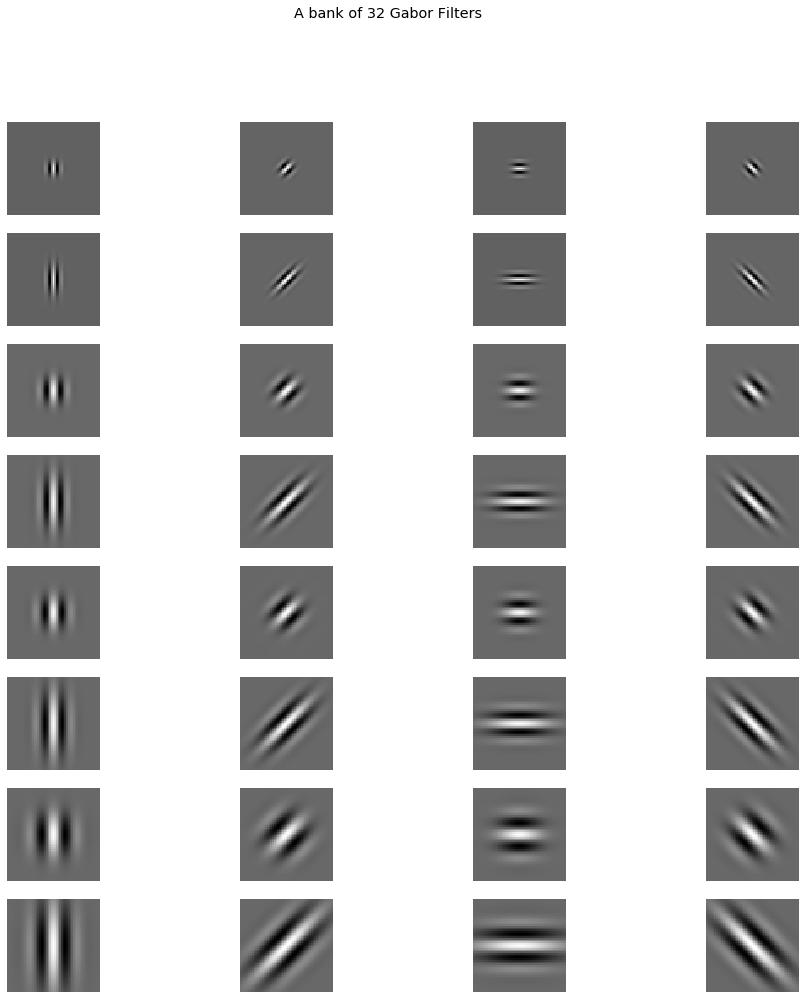

In [3]:
def genGabor(sz, theta, gamma, sigma, lamba ):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))
    
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    
    gabor = np.exp(-(x_theta**2 + y_theta**2*gamma**2)/(2*sigma**2))*np.cos(2*math.pi*x_theta/(lamba))
    return gabor


filter_size = [5,9,11,15] 
theta = np.arange(0, np.pi, np.pi/4) # range of theta
GaborBank = []

for i in range(len(filter_size)):
    for l in range(1,3):
        for j in range(len(theta)):
            g1 = genGabor((55,55),theta[j],1/l,0.56*filter_size[i],filter_size[i]) 
            GaborBank.append(g1)
           
        
        
fig = plt.figure("A bank of 32 Gabor Filters", figsize=(16, 16))
fig.suptitle("A bank of 32 Gabor Filters", fontsize="x-large")

for i in range(len(GaborBank)):
    plt.subplot(8,4,i+1)
    plt.axis('off'); 
    plt.imshow(GaborBank[i], cmap=plt.gray())
    



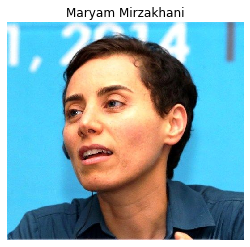

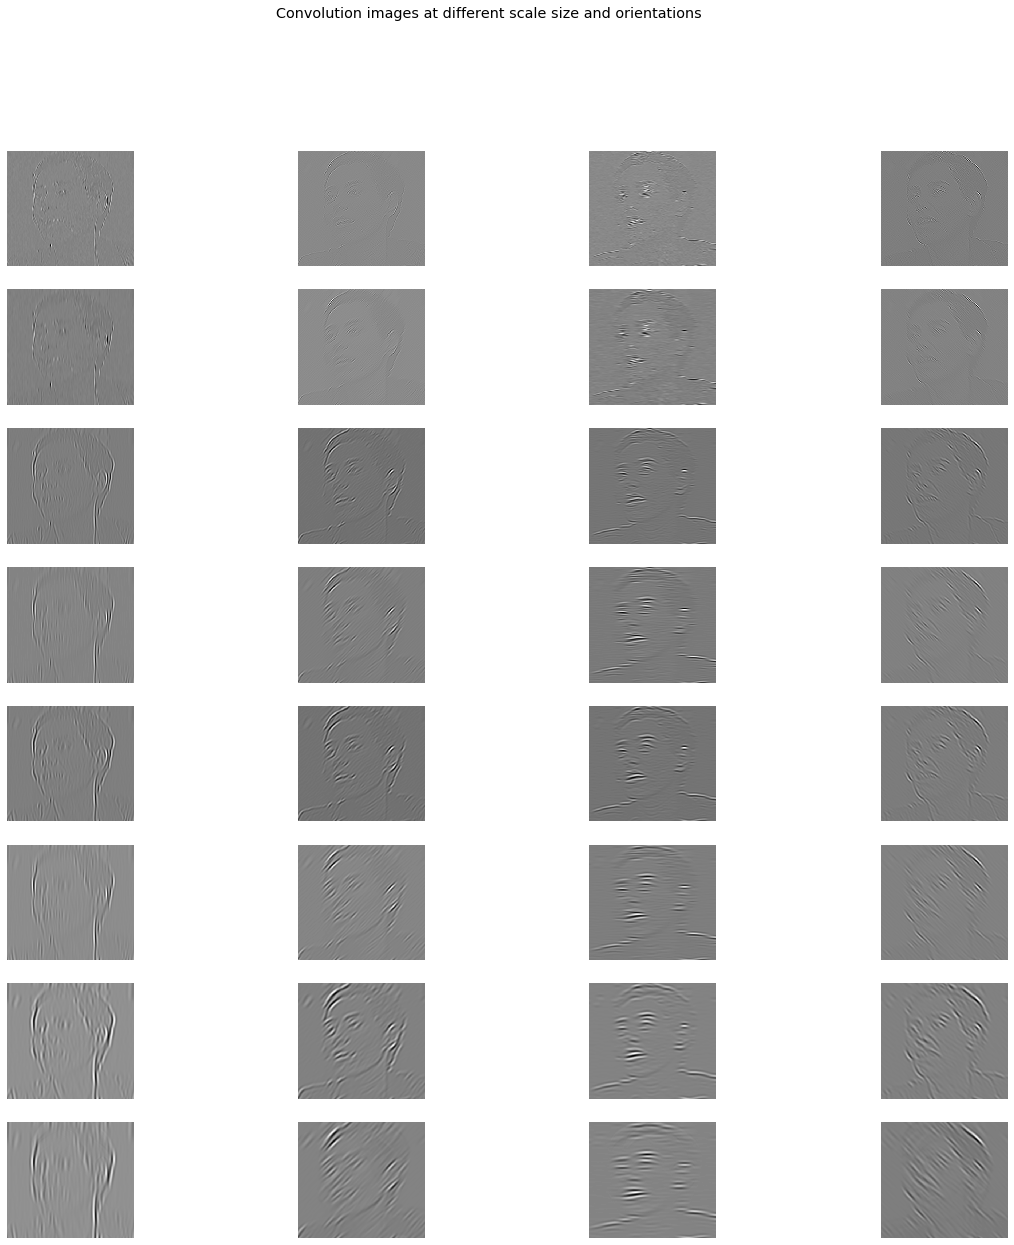

In [53]:
def convolveGabor(image_address=""):
    pic = plt.imread(image_address)
    r, g, b = pic[:,:,0], pic[:,:,1], pic[:,:,2]
    gray_pic = 0.2989 * r + 0.5870 * g + 0.1140 * b     
   
    fig=plt.figure("Maryam-Mirzakhani"); 
    plt.title("Maryam Mirzakhani")
    plt.axis('off'); plt.imshow(pic, cmap=plt.gray())
    result = []

    fig = plt.figure("Convolution images at different scale s and orientations", figsize=(20, 20))
    fig.suptitle("Convolution images at different scale size and orientations", fontsize="x-large")
    for i in range(len(GaborBank)):
        plt.subplot(8,4,i+1)
        kernel = GaborBank[i]
        res = convolve2d(gray_pic, kernel, mode='valid') 
        result.append(res)
        plt.axis('off'); 
        plt.imshow(res, cmap=plt.gray())
    
convolveGabor("/home/sharare/Desktop/mary.jpg")

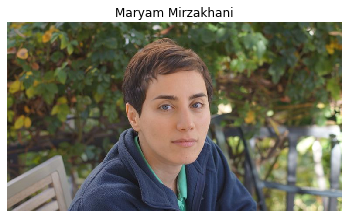

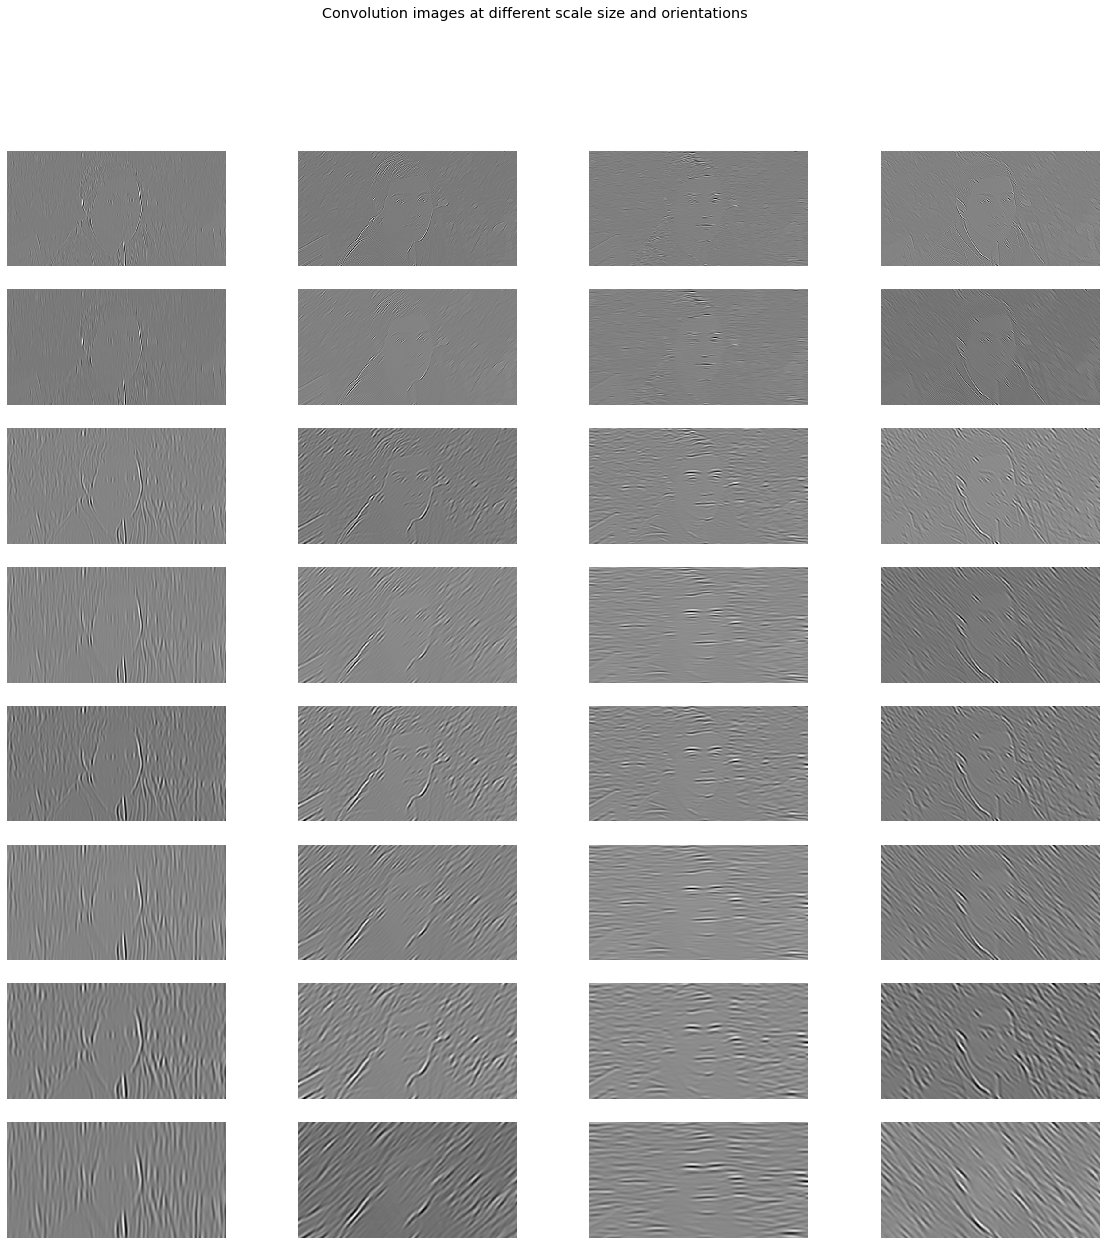

In [54]:
convolveGabor("/home/sharare/Desktop/mmm.jpg")

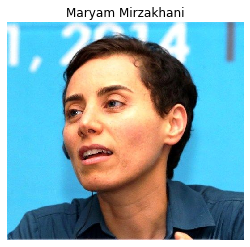

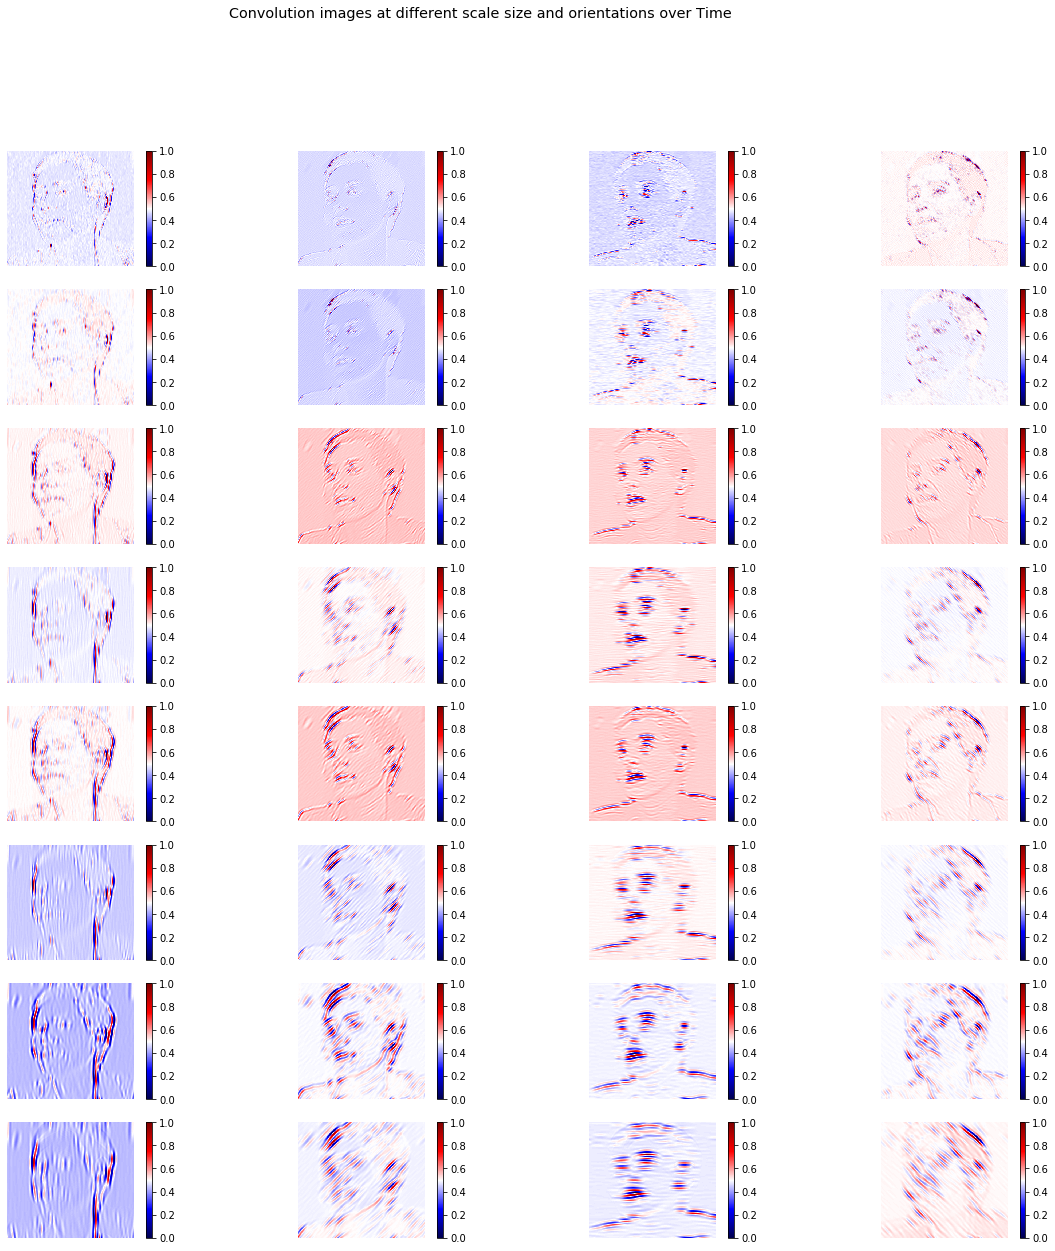

In [51]:
def myimgshow(I, **kwargs):
    # utility function to show image
    plt.axis('off')
    plt.imshow(I, cmap="seismic", vmin=result_norm.max() , vmax=result_norm.min(),**kwargs)
    plt.colorbar()

def Gabor_time(image_address=""):
    pic = plt.imread(image_address)
    r, g, b = pic[:,:,0], pic[:,:,1], pic[:,:,2]
    gray_pic = 0.2989 * r + 0.5870 * g + 0.1140 * b     
   
    fig=plt.figure("Maryam-Mirzakhani"); 
    plt.title("Maryam Mirzakhani")
    plt.axis('off'); plt.imshow(pic, cmap=plt.gray())

    
    fig = plt.figure("Convolution images at different scale s and orientations", figsize=(20, 20))
    fig.suptitle("Convolution images at different scale size and orientations over Time", fontsize="x-large")
    for i in range(len(GaborBank)):
        plt.subplot(8,4,i+1)
        kernel = GaborBank[i]
        res = convolve2d(gray_pic, kernel, mode='valid') 
        result_norm=(res.max()-res)/(res.max()-res.min())
        myimgshow(result_norm)
    

Gabor_time("/home/sharare/Desktop/mary.jpg")    

#### In these diagrams we show which lines of the image are detected in order over time. We show this with the color bar, Lines that are detected faster are marked in blue and lines that are detected later are marked in red.

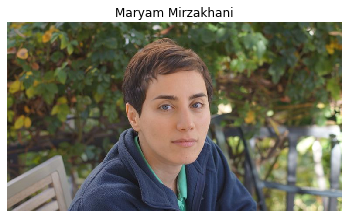

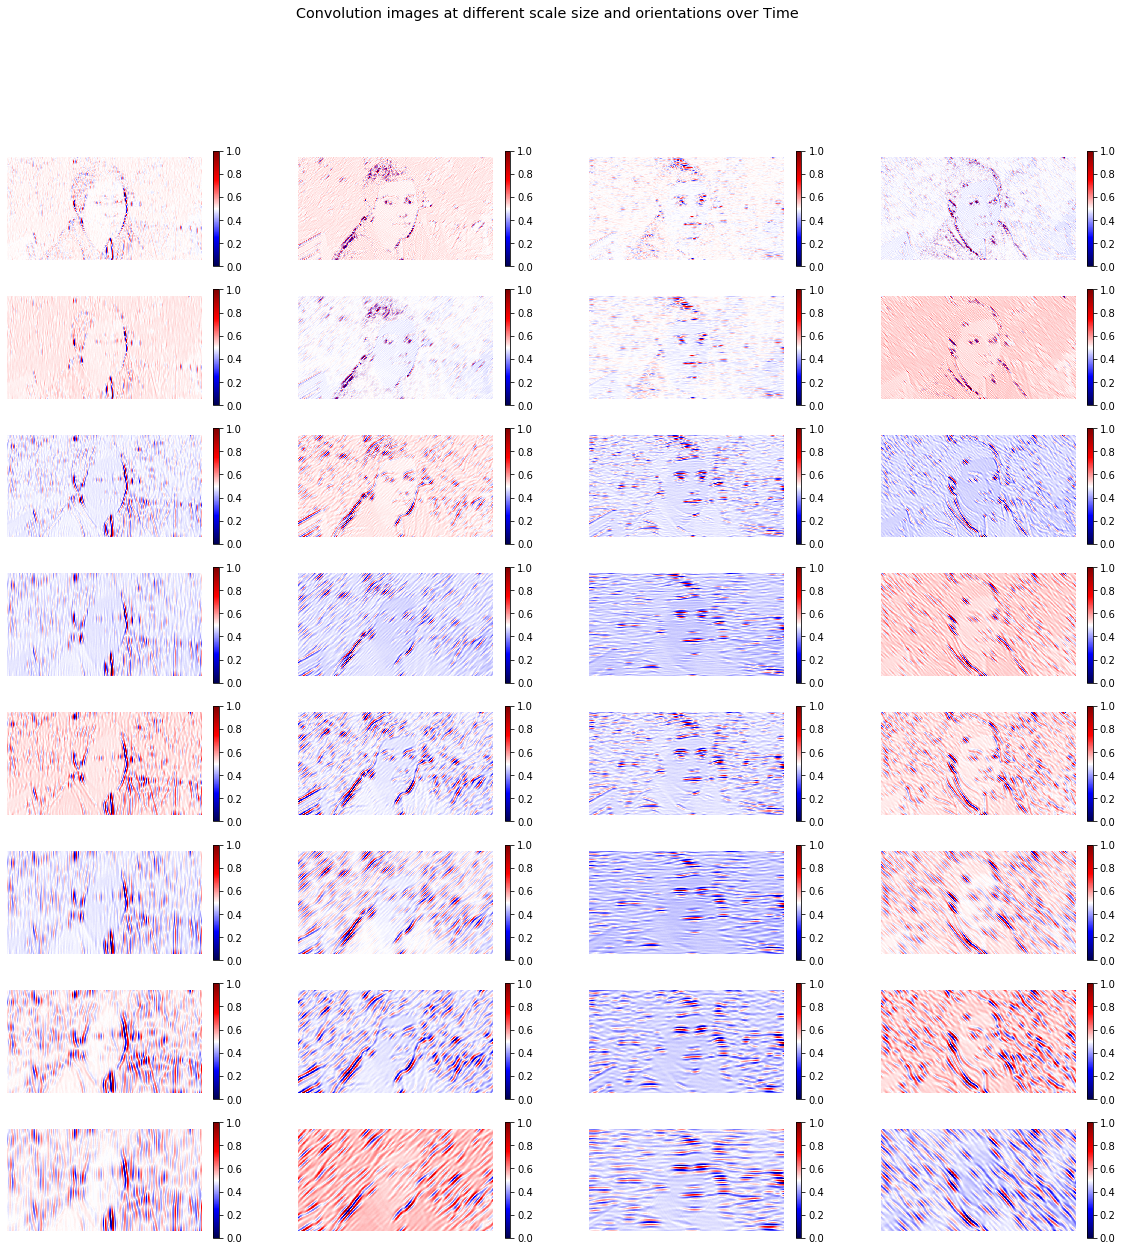

In [52]:
Gabor_time("/home/sharare/Desktop/mmm.jpg")

Sharare Zolghadr (610395109)                                                                                   

Computational Neuroscience